In [551]:
pip install tensorflow_decision_forests 

Note: you may need to restart the kernel to use updated packages.


In [552]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [553]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.19.0
TensorFlow Decision Forests v1.12.0


In [554]:
train_file_path = "../data/train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


In [555]:
dataset_df.head(3)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [556]:
dataset_df = dataset_df.drop('Id', axis=1)

In [557]:
dataset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [558]:
print(dataset_df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_91268/318364108.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4},ax=axes[0]);
/tmp/ipykernel_91268/318364108.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, h

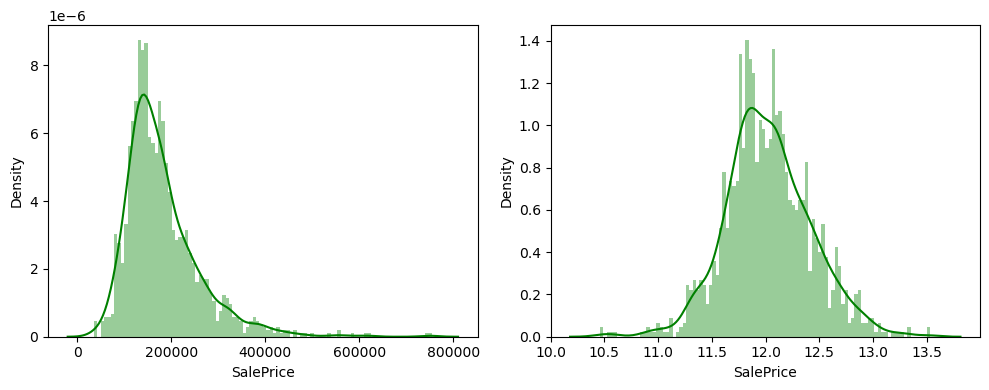

In [559]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()  # pour accéder facilement à chaque subplot

sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4},ax=axes[0]);

dataset_df['SalePrice']= dataset_df['SalePrice'].apply(lambda x: np.log1p(x))

sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4},ax=axes[1])

plt.tight_layout()
plt.show()



### Change the type of the variable to the right one:

In [560]:
dataset_df['MSSubClass'] = dataset_df['MSSubClass'].astype(str)
dataset_df['OverallQual'] = dataset_df['OverallQual'].astype(int)
dataset_df['OverallCond'] = dataset_df['OverallCond'].astype(int)
# dataset_df['YearBuilt'] = dataset_df['YearBuilt'].astype(str)
# dataset_df['YearRemodAdd'] = dataset_df['YearRemodAdd'].astype(str)
# dataset_df['BsmtFullBath'] = dataset_df['BsmtFullBath'].astype(str)
# dataset_df['BsmtHalfBath'] = dataset_df['BsmtHalfBath'].astype(str)
# dataset_df['FullBath'] = dataset_df['FullBath'].astype(str)
# dataset_df['HalfBath'] = dataset_df['HalfBath'].astype(str)
dataset_df['BedroomAbvGr'] = dataset_df['BedroomAbvGr'].astype(int)
dataset_df['KitchenAbvGr'] = dataset_df['KitchenAbvGr'].astype(int)
dataset_df['TotRmsAbvGrd'] = dataset_df['TotRmsAbvGrd'].astype(int)
dataset_df['Fireplaces'] = dataset_df['Fireplaces'].astype(int)
# dataset_df['GarageYrBlt'] = dataset_df['GarageYrBlt'].astype(str)
dataset_df['GarageCars'] = dataset_df['GarageCars'].astype(str)
# dataset_df['MoSold'] = dataset_df['MoSold'].astype(str)
# dataset_df['YrSold'] = dataset_df['YrSold'].astype(str)

In [561]:
list(set(dataset_df.dtypes.tolist()))


[dtype('O'), dtype('int64'), dtype('float64')]

### Create the data set of only numerical columns:

In [562]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,12.247699
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,12.109016
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,12.317171
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,11.849405
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,12.429220


### Check how many NaN in the numerical columns:

In [563]:
df_num.isna().sum()

LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

### Check the correlation between each variable VS SalePrice:

<Axes: >

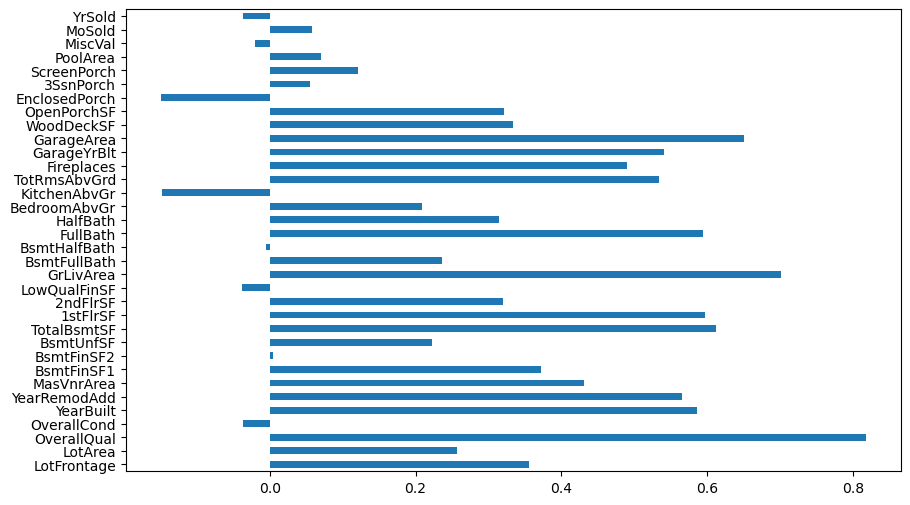

In [564]:
correlation_values = df_num.corr()["SalePrice"].drop("SalePrice")
correlation_values.plot(kind='barh', figsize=(10, 6))

### View the distribution of each numerical variable:

array([[<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>],
       [<Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>],
       [<Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'Kitc

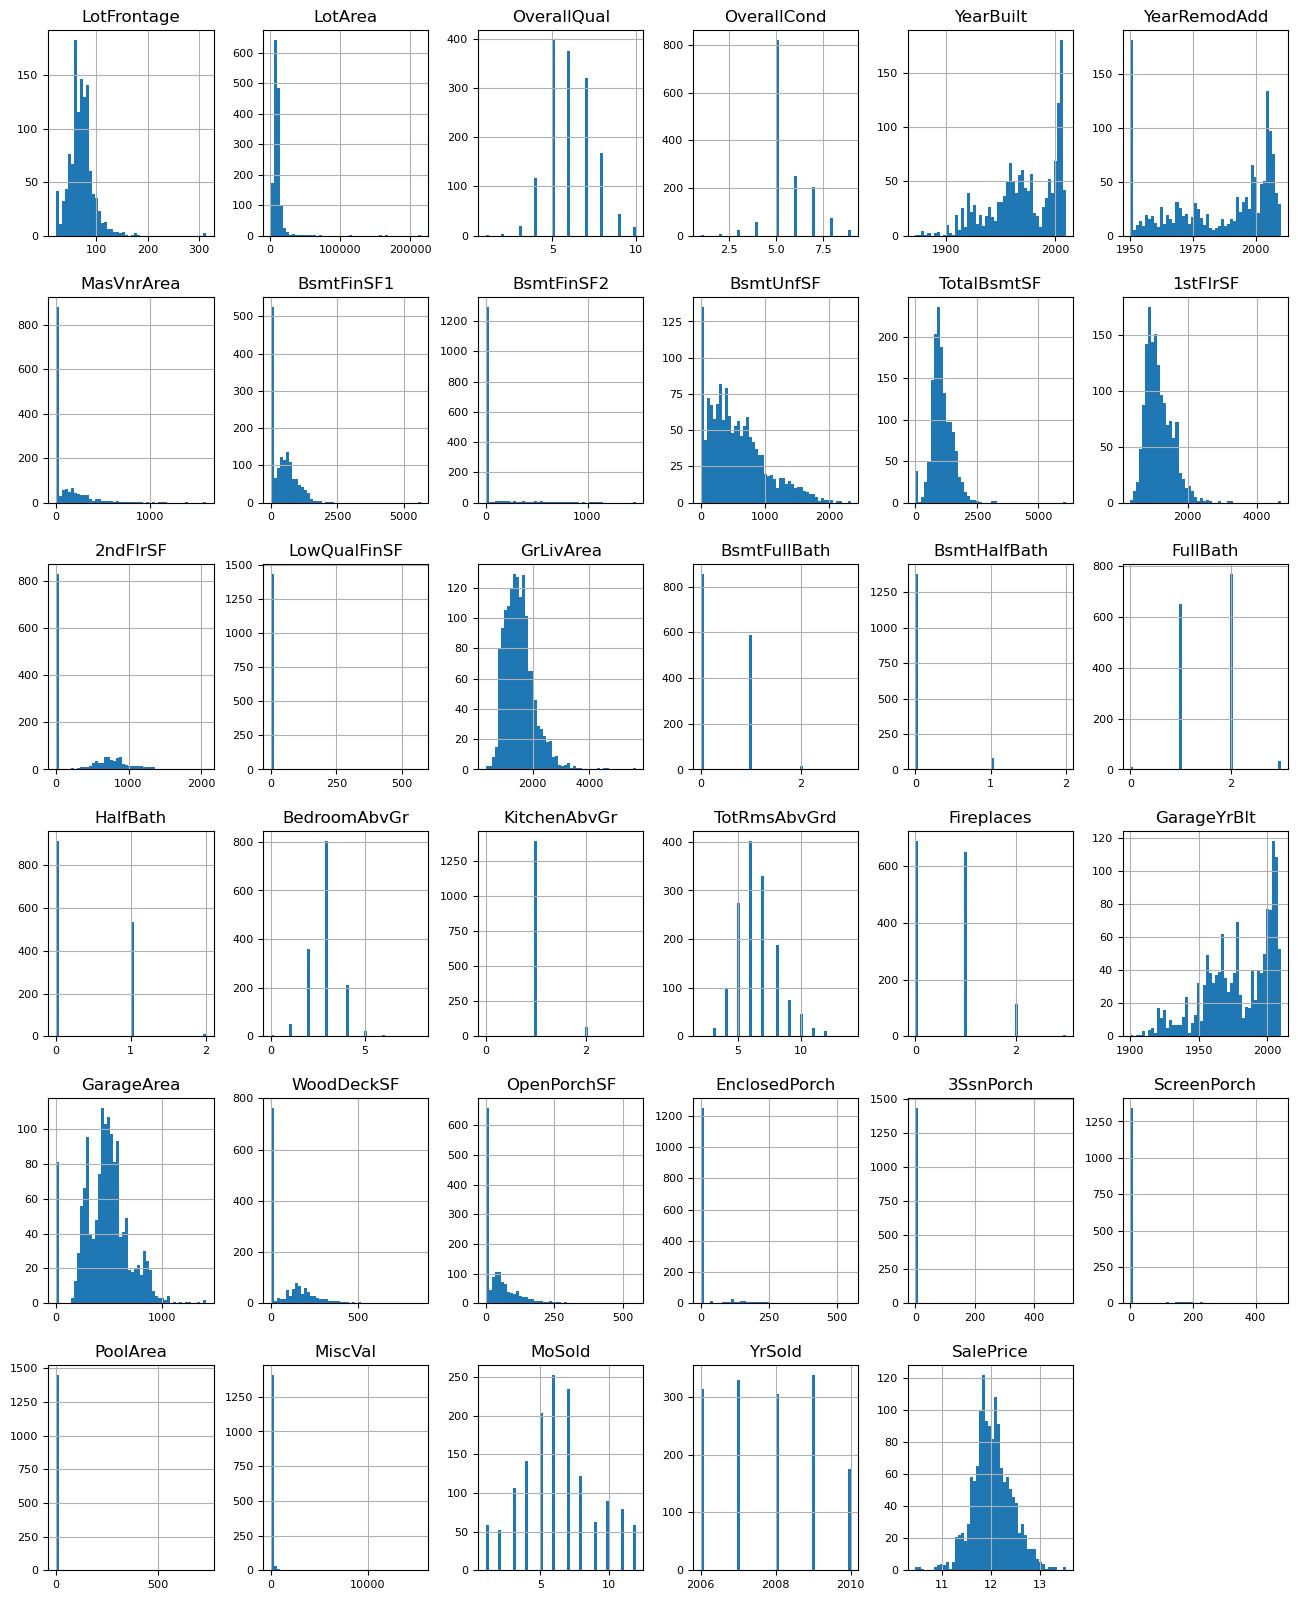

In [565]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)


### Check how many NaN values in the complete dataset:

In [566]:
print("NaN values remaining:", dataset_df.isnull().sum().sum())
print(dataset_df.isnull().sum()[dataset_df.isnull().sum() > 0])

NaN values remaining: 7829
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [567]:
dataset_df.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
682,120,RL,NaN,2887,Pave,NaN,Reg,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,12.061053
100,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,12.230770
725,20,RL,60.0,6960,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Shed,500,11,2009,WD,Normal,11.699413
716,70,RM,60.0,10800,Pave,Grvl,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,11.979805
1387,50,RM,60.0,8520,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,8,2007,CWD,Family,11.820418
692,60,RL,42.0,26178,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,12.721889
1176,20,RL,37.0,6951,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,MnPrv,NaN,0,10,2008,WD,Normal,11.691080
572,60,RL,83.0,13159,Pave,NaN,IR1,HLS,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,12.321635
1336,90,RL,87.0,9246,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,11.813037
1330,20,RL,85.0,10000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,12.332710


### Create new better columns GarageAgeAtSale and HouseAgeAtSale:

In [568]:
dataset_df["HouseAgeAtSale"] = dataset_df["YrSold"].astype(float) - dataset_df["YearBuilt"].astype(float)
# dataset_df["RemodAgeAtSale"] = dataset_df["YrSold"].astype(float) - test_data["YearRemodAdd"].astype(float)
dataset_df["GarageAgeAtSale"] = dataset_df["YrSold"].astype(float) - dataset_df["GarageYrBlt"].astype(float)
dataset_df = dataset_df.drop(columns=["YrSold"], errors="ignore")

### Create new better columns BsmtBath and Bath:

In [569]:
dataset_df["BsmtBath"] = dataset_df["BsmtFullBath"].astype(float) + 0.5 * dataset_df["BsmtHalfBath"].astype(float)
dataset_df["Bath"] = dataset_df["FullBath"].astype(float) + 0.5 * dataset_df["HalfBath"].astype(float)
# dataset_df = dataset_df.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], errors="ignore")

### Create new column TotalSF:

In [570]:
# dataset_df["TotalSF"] = dataset_df["1stFlrSF"].astype(float) + dataset_df["2ndFlrSF"].astype(float) + dataset_df["TotalBsmtSF"].astype(float)

### Change columns categorical into ordinal:

In [571]:
quality_mapping = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}
# Remplacer les valeurs
dataset_df["KitchenQual"] = dataset_df["KitchenQual"].replace(quality_mapping).astype(int)
# dataset_df = dataset_df.drop(columns=["KitchenQual"], errors="ignore")

/tmp/ipykernel_91268/1291931383.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["KitchenQual"] = dataset_df["KitchenQual"].replace(quality_mapping).astype(int)


In [572]:
finish_mapping = {"Fin": 3, "RFn": 2, "Unf": 1}


# Remplacer les valeurs
dataset_df["GarageFinish"] = dataset_df["GarageFinish"].replace(finish_mapping)
dataset_df["GarageQual"] = dataset_df["GarageQual"].replace(quality_mapping)
dataset_df["GarageCond"] = dataset_df["GarageCond"].replace(quality_mapping)

# dataset_df = dataset_df.drop(columns=["GarageQual"], errors="ignore")

/tmp/ipykernel_91268/3448772247.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["GarageFinish"] = dataset_df["GarageFinish"].replace(finish_mapping)
/tmp/ipykernel_91268/3448772247.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["GarageQual"] = dataset_df["GarageQual"].replace(quality_mapping)
/tmp/ipykernel_91268/3448772247.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(cop

In [573]:
exposure_mapping = {"Gd": 3, "Av": 2, "Mn": 1, "No": 0}
# Remplacer les valeurs
dataset_df["BsmtQual"] = dataset_df["BsmtQual"].replace(quality_mapping)
dataset_df["BsmtCond"] = dataset_df["BsmtCond"].replace(quality_mapping)
dataset_df["BsmtExposure"] = dataset_df["BsmtExposure"].replace(exposure_mapping)
# dataset_df = dataset_df.drop(columns=["KitchenQual"], errors="ignore")

/tmp/ipykernel_91268/3286904787.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["BsmtQual"] = dataset_df["BsmtQual"].replace(quality_mapping)
/tmp/ipykernel_91268/3286904787.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["BsmtCond"] = dataset_df["BsmtCond"].replace(quality_mapping)
/tmp/ipykernel_91268/3286904787.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. 

In [574]:
dataset_df["PoolQC"] = dataset_df["PoolQC"].replace(quality_mapping)

/tmp/ipykernel_91268/2550649854.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df["PoolQC"] = dataset_df["PoolQC"].replace(quality_mapping)


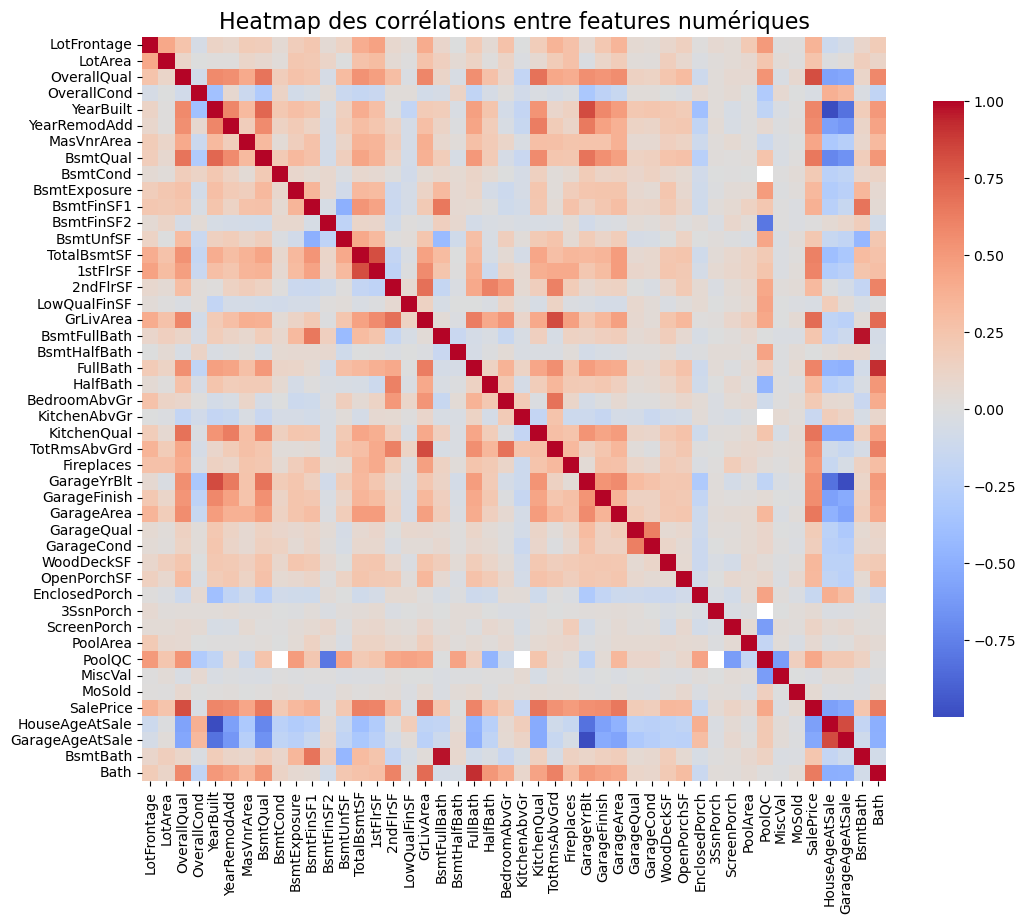

In [575]:
numerical_cols = dataset_df.select_dtypes(include=['int64', 'float64']).columns
df_num = dataset_df[numerical_cols]
# Calculer la matrice de corrélation
corr_matrix = df_num.corr()

# Afficher la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix, 
    # annot=True,        # affiche les valeurs
    fmt=".2f",         # format des valeurs
    cmap="coolwarm",   # palette de couleurs
    square=True,       # cellules carrées
    cbar_kws={"shrink": 0.8}  # taille de la barre de couleur
)
plt.title("Heatmap des corrélations entre features numériques", fontsize=16)
plt.show()

In [576]:
from itertools import combinations

# Sélection des colonnes numériques
num_cols = dataset_df.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('SalePrice')  # enlever la target


# Corrélation absolue avec la target
corr_with_target = dataset_df[num_cols + ['SalePrice']].corr()['SalePrice'].abs()

# Seuil pour garder les features pertinentes
corr_threshold = 0.1
top_features = corr_with_target[corr_with_target > corr_threshold].index.tolist()
top_features.remove('SalePrice')

# Générer toutes les paires possibles
pairs = list(combinations(top_features, 2))

# Calculer un score d'interaction inversé : plus la corrélation directe est faible, plus le score est grand
interaction_scores = []
for f1, f2 in pairs:
    interaction_feature = dataset_df[f1] * dataset_df[f2]
    corr_interaction = abs(np.corrcoef(interaction_feature, dataset_df['SalePrice'])[0, 1])
    
    # Corrélation individuelle avec la target
    f1_corr = corr_with_target[f1]
    f2_corr = corr_with_target[f2]
    
    # Corrélation maximale de chaque feature avec la target
    max_indiv_corr = max(f1_corr, f2_corr)
    
    # Corrélation entre f1 et f2
    f1_f2_corr = abs(dataset_df[[f1, f2]].corr().iloc[0, 1])
    
    # Score final : interaction forte, mais pénalisé si corr individuelle forte ou corr entre features forte
    # importance_score = corr_interaction * (1 - max(f1_corr, f2_corr)) * (1 - f1_f2_corr)
    importance_score = corr_interaction * (1 - f1_f2_corr)

    # Ne garder que si la corrélation mutuelle > corrélation individuelle max
    if f1_f2_corr > max_indiv_corr:
        interaction_scores.append((f1, f2, importance_score))
    
    # interaction_scores.append((f1, f2, importance_score))

# Trier par score décroissant
interaction_scores.sort(key=lambda x: x[2], reverse=True)

# Top 10 interactions potentielles
top_interactions = interaction_scores[:10]
print("Top 10 paires avec interaction potentielle (corr individuelle et corr mutuelle faibles -> haut) :")
for f1, f2, score in top_interactions:
    print(f"{f1} x {f2} -> score: {score:.3f}")

Top 10 paires avec interaction potentielle (corr individuelle et corr mutuelle faibles -> haut) :
LotFrontage x LotArea -> score: nan
LotFrontage x PoolQC -> score: nan
YearBuilt x YearRemodAdd -> score: 0.263
YearBuilt x BsmtQual -> score: nan
YearBuilt x GarageYrBlt -> score: nan
YearBuilt x GarageAgeAtSale -> score: nan
YearRemodAdd x GarageYrBlt -> score: nan
YearRemodAdd x HouseAgeAtSale -> score: 0.239
YearRemodAdd x GarageAgeAtSale -> score: nan
BsmtQual x GarageYrBlt -> score: nan


### Create interaction columns:

In [577]:
dataset_df["OverallQual*YearBuilt"] = dataset_df["OverallQual"].astype(float) * dataset_df["YearBuilt"].astype(float)
dataset_df["OverallQual*GrLivArea"] = dataset_df["OverallQual"].astype(float) * dataset_df["GrLivArea"].astype(float)
dataset_df["OverallQual*LotFrontage"] = dataset_df["OverallQual"].astype(float) * dataset_df["LotFrontage"].astype(float)

dataset_df["LotFrontage*LotArea"] = dataset_df["LotFrontage"].astype(float) * dataset_df["LotArea"].astype(float)
dataset_df["LotFrontage*YearBuilt"] = dataset_df["LotFrontage"].astype(float) * dataset_df["YearBuilt"].astype(float)
dataset_df["LotFrontage*PoolQC"] = dataset_df["LotFrontage"].astype(float) * dataset_df["PoolQC"].astype(float)

dataset_df["YearBuilt*YearRemodAdd"] = dataset_df["YearBuilt"].astype(float) * dataset_df["YearRemodAdd"].astype(float)



### Remove not important columns (related to inspector.variable_importances):

In [578]:
dataset_df = dataset_df.drop(
    columns=['LandSlope', 'Alley', 'Heating', 'MasVnrType', 'Fence'], 
    errors="ignore")

In [579]:
# dataset_df = dataset_df.drop(
#     columns=['Electrical', 'SaleType', 'LandSlope', 'Fence', 'BsmtFinType2', 'MasVnrType', 'Alley', 'RoofMatl', 'Condition2', 'Heating'], 
#     errors="ignore")

In [580]:
# dataset_df = dataset_df.drop(
#     columns=['GarageType', 'PavedDrive', 'SaleCondition', 'LandContour', 'HeatingQC', 'HouseStyle', 'BldgType', 'LotConfig', 'ExterCond', 'LotShape', 'RoofStyle', \
#              'Foundation', 'FireplaceQu', 'Condition1', 'Functional', 'HeatingQC'], 
#     errors="ignore")

In [581]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 85 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MSSubClass               1460 non-null   object 
 1   MSZoning                 1460 non-null   object 
 2   LotFrontage              1201 non-null   float64
 3   LotArea                  1460 non-null   int64  
 4   Street                   1460 non-null   object 
 5   LotShape                 1460 non-null   object 
 6   LandContour              1460 non-null   object 
 7   Utilities                1460 non-null   object 
 8   LotConfig                1460 non-null   object 
 9   Neighborhood             1460 non-null   object 
 10  Condition1               1460 non-null   object 
 11  Condition2               1460 non-null   object 
 12  BldgType                 1460 non-null   object 
 13  HouseStyle               1460 non-null   object 
 14  OverallQual             

In [582]:
dataset_df.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,Neighborhood,...,GarageAgeAtSale,BsmtBath,Bath,OverallQual*YearBuilt,OverallQual*GrLivArea,OverallQual*LotFrontage,LotFrontage*LotArea,LotFrontage*YearBuilt,LotFrontage*PoolQC,YearBuilt*YearRemodAdd
1201,60,RL,80.0,10400,Pave,Reg,Lvl,AllPub,Corner,CollgCr,...,11.0,0.0,2.5,13986.0,12453.0,560.0,832000.0,159840.0,NaN,3992004.0
550,120,RL,53.0,4043,Pave,Reg,Lvl,AllPub,Inside,NPkVill,...,31.0,0.0,2.0,11862.0,6414.0,318.0,214279.0,104781.0,NaN,3908529.0
953,60,RL,NaN,11075,Pave,IR1,Lvl,AllPub,Inside,Mitchel,...,39.0,0.5,2.5,9845.0,9840.0,NaN,NaN,NaN,NaN,3876961.0
1259,20,RL,65.0,9750,Pave,Reg,Lvl,AllPub,FR2,NAmes,...,39.0,1.0,1.5,11814.0,6324.0,390.0,633750.0,127985.0,NaN,3876961.0
978,20,RL,68.0,9450,Pave,Reg,Bnk,AllPub,Inside,Edwards,...,8.0,0.0,1.0,7816.0,3576.0,272.0,642600.0,132872.0,NaN,3818116.0
105,60,FV,75.0,9375,Pave,Reg,Lvl,AllPub,Inside,Somerst,...,5.0,0.0,2.5,16024.0,15936.0,600.0,703125.0,150225.0,NaN,4014012.0
1238,20,RL,63.0,13072,Pave,Reg,Lvl,AllPub,Inside,SawyerW,...,1.0,0.0,1.5,12030.0,6846.0,378.0,823536.0,126315.0,NaN,4020025.0
827,20,RL,65.0,8529,Pave,IR1,Lvl,AllPub,Inside,SawyerW,...,8.0,0.0,2.0,14007.0,10038.0,455.0,554385.0,130065.0,NaN,4004001.0
371,50,RL,80.0,17120,Pave,Reg,Lvl,AllPub,Inside,ClearCr,...,17.0,0.0,2.0,7836.0,6352.0,320.0,1369600.0,156720.0,NaN,3837681.0
735,75,RM,60.0,10800,Pave,Reg,Lvl,AllPub,Inside,OldTown,...,92.0,0.0,1.5,13398.0,12376.0,420.0,648000.0,114840.0,NaN,3770580.0


In [583]:
print("NaN values remaining:", dataset_df.isnull().sum().sum())

NaN values remaining: 6721


### In categorical columns, put all rare categories into one unique category "Other":

In [584]:
threshold = dataset_df.shape[0] * 0.005  # nombre minimum d'occurrences pour ne pas être rare

# Boucle sur toutes les colonnes de type object (catégorielles)
for col in dataset_df.select_dtypes(include=['object']).columns:
    counts = dataset_df[col].value_counts()
    rare_cats = counts[counts < threshold].index
    dataset_df[col] = dataset_df[col].replace(rare_cats, "Other")


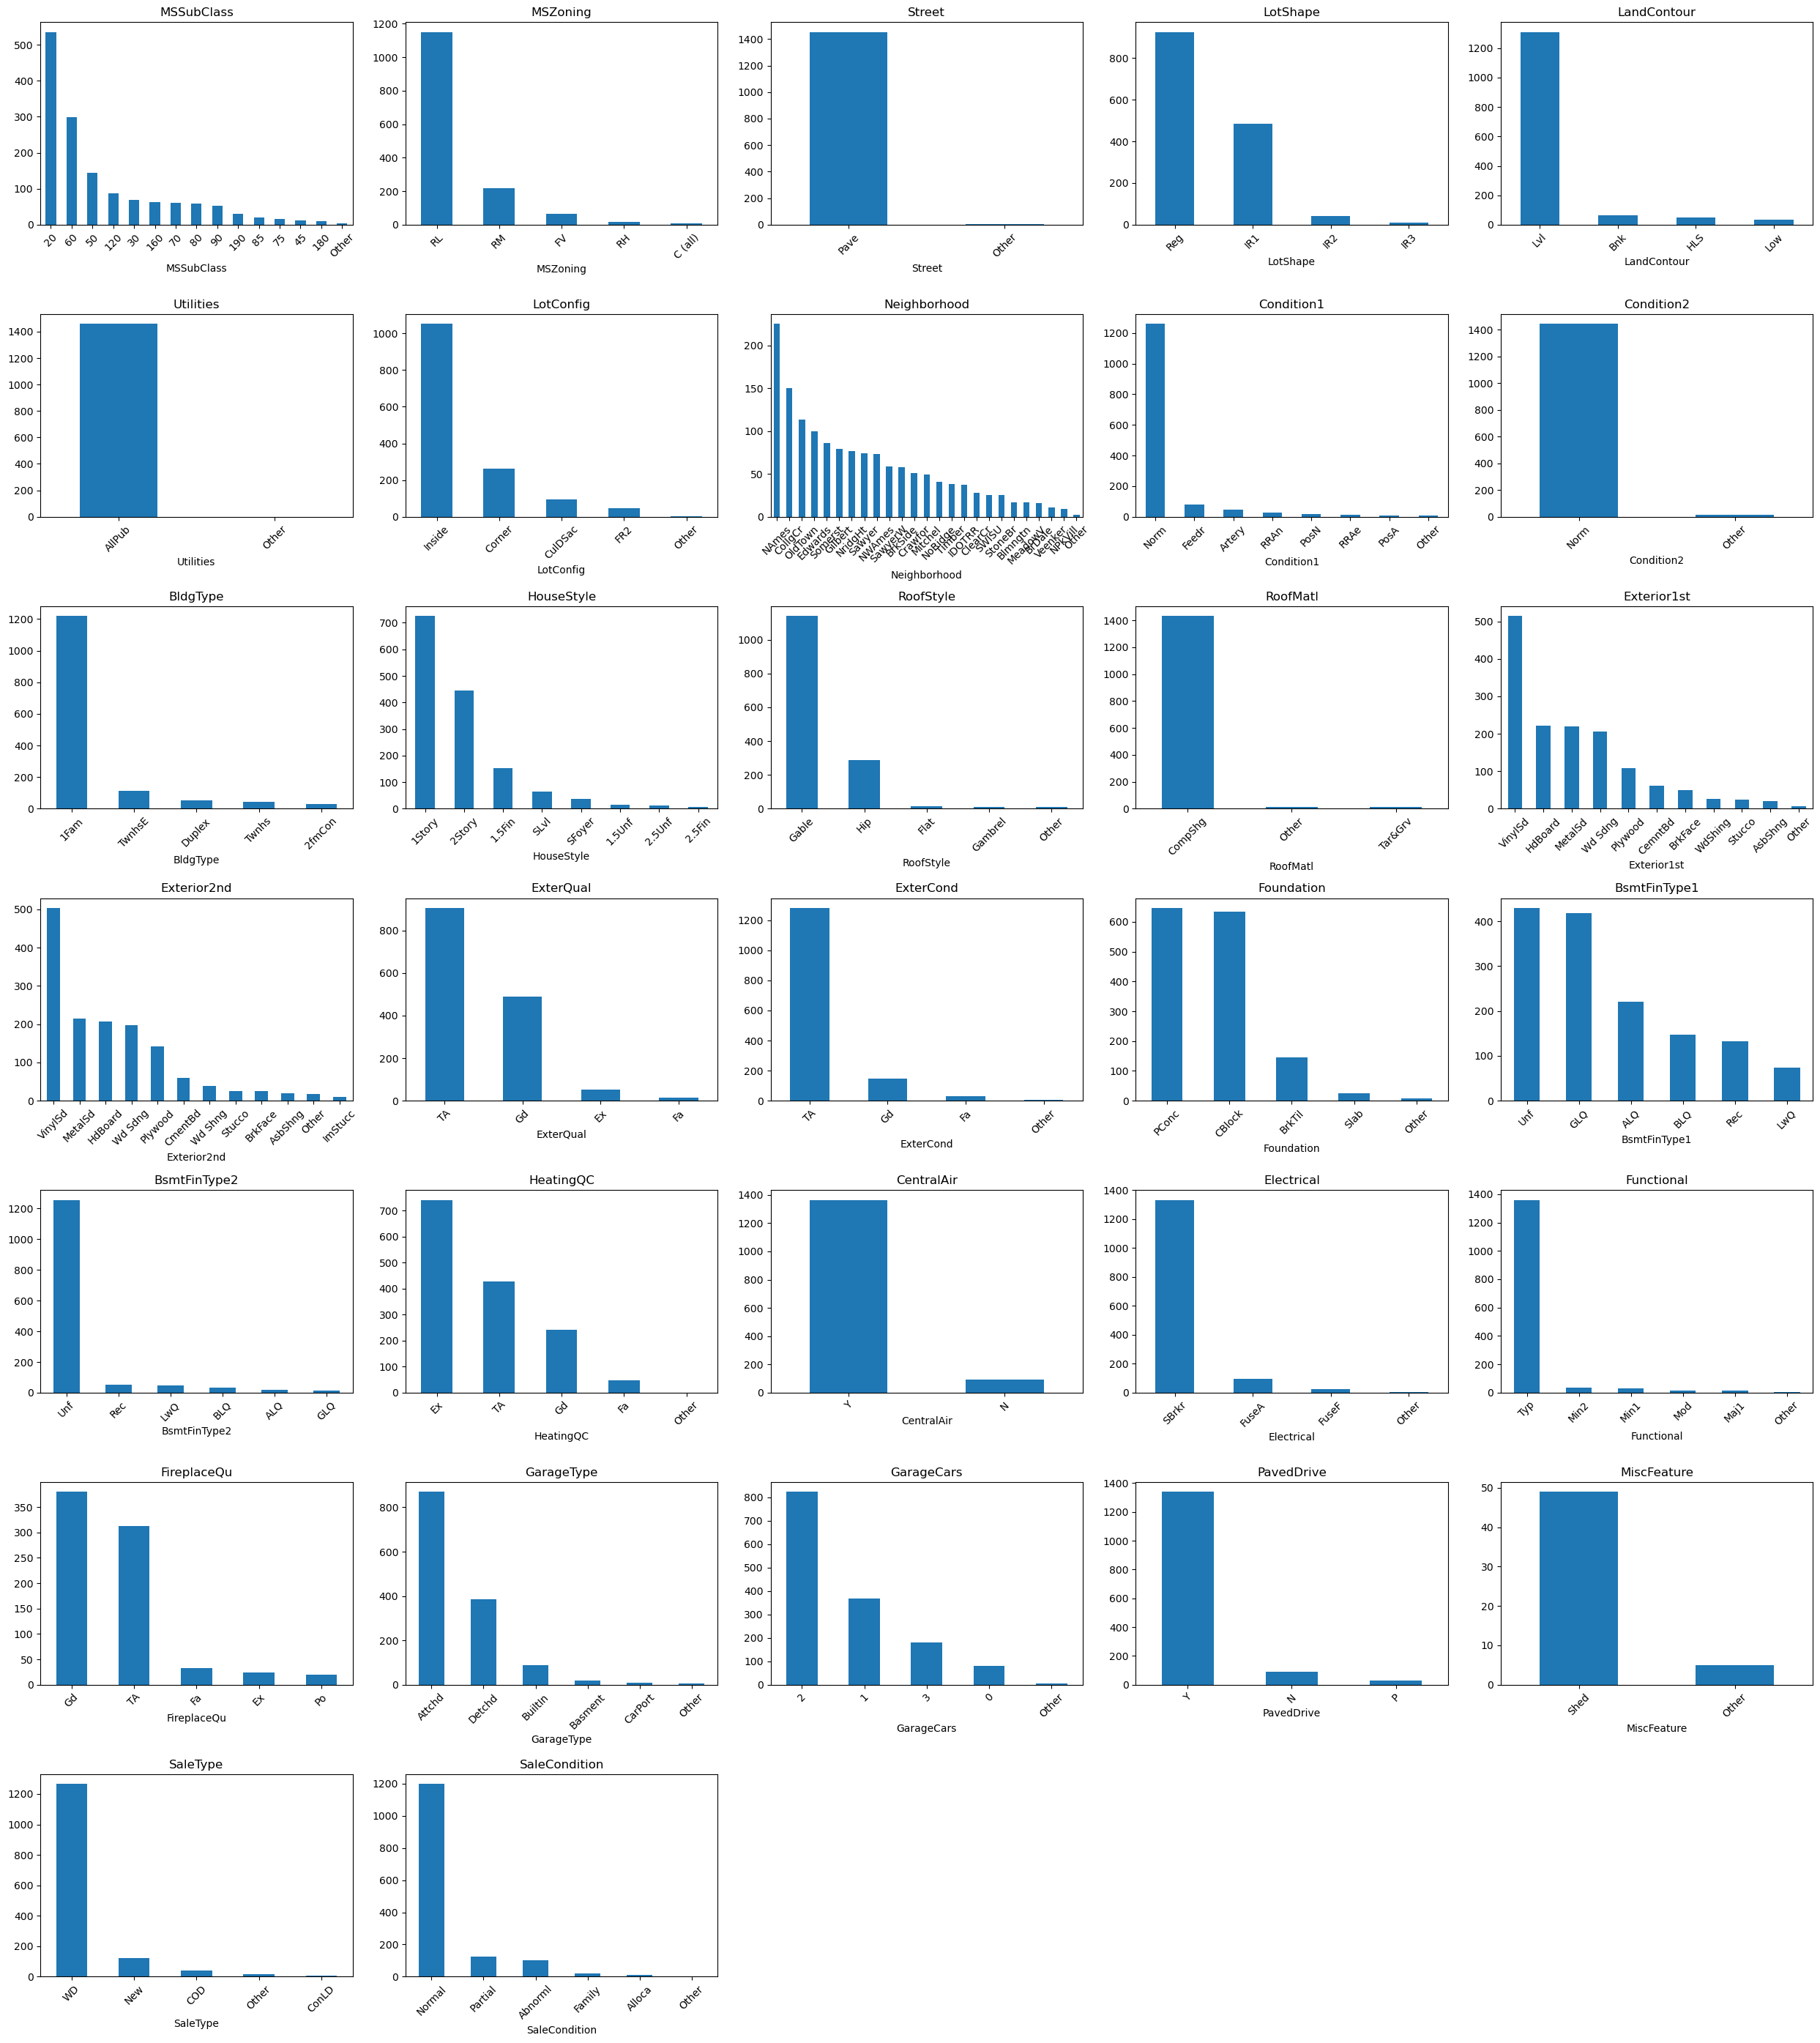

In [585]:
# dataset_df.select_dtypes(include = ['O']).plot.box(figsize=(16, 20));
cat_cols = dataset_df.select_dtypes(include=['object']).columns

# Déterminer la taille de la figure
n_cols = 5  # nombre de colonnes de subplots
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # nombre de lignes nécessaires

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  # pour accéder facilement à chaque subplot

for i, col in enumerate(cat_cols):
    dataset_df[col].value_counts().plot(kind='bar', ax=axes[i], title=col)
    axes[i].tick_params(axis='x', rotation=45)

# Supprimer les axes vides si cat_cols n'est pas multiple de n_cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


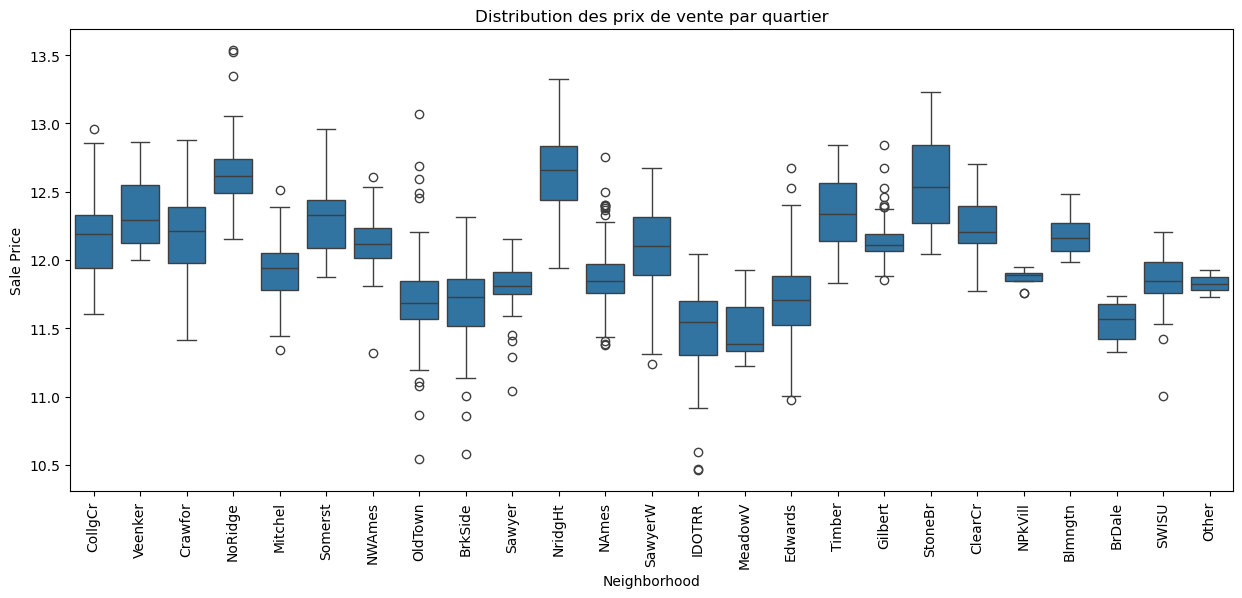

In [586]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=dataset_df)
plt.xticks(rotation=90)
plt.title("Distribution des prix de vente par quartier")
plt.ylabel("Sale Price")
plt.xlabel("Neighborhood")
plt.show()

### Prepare full training data set:

In [587]:
from sklearn.model_selection import GroupKFold, KFold, GroupShuffleSplit, StratifiedKFold, StratifiedGroupKFold
from sklearn.metrics import mean_squared_error
import tensorflow_decision_forests as tfdf
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

dataset_df_rand = dataset_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Séparer la target
y = dataset_df['SalePrice']
y_binned = pd.qcut(dataset_df["SalePrice"], q=20, labels=False, duplicates="drop")
X = dataset_df.drop(columns=['SalePrice'])

# Sélection des colonnes catégorielles
X_xgb = X.copy()
categorical_cols = X_xgb.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
    le = LabelEncoder()
    X_xgb[col] = le.fit_transform(X_xgb[col].astype(str))
# X_rand = dataset_df_rand.drop(columns=["SalePrice"], axis=1)
# y_rand = dataset_df_rand["SalePrice"]

### Prepare test data set:

In [588]:
test_file_path = "../data/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_data["HouseAgeAtSale"] = test_data["YrSold"].astype(float) - test_data["YearBuilt"].astype(float)
# test_data["RemodAgeAtSale"] = test_data["YrSold"].astype(float) - test_data["YearRemodAdd"].astype(float)
test_data["GarageAgeAtSale"] = test_data["YrSold"].astype(float) - test_data["GarageYrBlt"].astype(float)
test_data = test_data.drop(columns=["YrSold"], errors="ignore")

test_data["BsmtBath"] = test_data["BsmtFullBath"].astype(float) + 0.5 * test_data["BsmtHalfBath"].astype(float)
test_data["Bath"] = test_data["FullBath"].astype(float) + 0.5 * test_data["HalfBath"].astype(float)
# test_data = test_data.drop(columns=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], errors="ignore")

# test_data["TotalSF"] = test_data["1stFlrSF"].astype(float) + dataset_df["2ndFlrSF"].astype(float) + dataset_df["TotalBsmtSF"].astype(float)

# Transform cat to ordinal
quality_mapping = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1}
# Remplacer les valeurs
test_data["KitchenQual"] = test_data["KitchenQual"].replace(quality_mapping)
# test_data = dataset_df.drop(columns=["KitchenQual"], errors="ignore")

finish_mapping = {"Fin": 3, "RFn": 2, "Unf": 1}
# Remplacer les valeurs
test_data["GarageFinish"] = test_data["GarageFinish"].replace(finish_mapping)
test_data["GarageQual"] = test_data["GarageQual"].replace(quality_mapping)
test_data["GarageCond"] = test_data["GarageCond"].replace(quality_mapping)
# test_data = test_data.drop(columns=["GarageQual"], errors="ignore")

exposure_mapping = {"Gd": 3, "Av": 2, "Mn": 1, "No": 0}
# Remplacer les valeurs
test_data["BsmtQual"] = test_data["BsmtQual"].replace(quality_mapping)
test_data["BsmtCond"] = test_data["BsmtCond"].replace(quality_mapping)
test_data["BsmtExposure"] = test_data["BsmtExposure"].replace(exposure_mapping)

test_data["PoolQC"] = test_data["PoolQC"].replace(quality_mapping)

# Interaction columns
test_data["OverallQual*YearBuilt"] = test_data["OverallQual"].astype(float) * test_data["YearBuilt"].astype(float)
test_data["OverallQual*GrLivArea"] = test_data["OverallQual"].astype(float) * test_data["GrLivArea"].astype(float)
test_data["OverallQual*LotFrontage"] = test_data["OverallQual"].astype(float) * test_data["LotFrontage"].astype(float)
test_data["LotFrontage*LotArea"] = test_data["LotFrontage"].astype(float) * test_data["LotArea"].astype(float)
test_data["LotFrontage*YearBuilt"] = test_data["LotFrontage"].astype(float) * test_data["YearBuilt"].astype(float)
test_data["LotFrontage*PoolQC"] = test_data["LotFrontage"].astype(float) * test_data["PoolQC"].astype(float)
test_data["YearBuilt*YearRemodAdd"] = test_data["YearBuilt"].astype(float) * test_data["YearRemodAdd"].astype(float)

test_data = test_data.drop(
    columns=['LandSlope', 'Alley', 'Heating', 'MasVnrType', 'Fence'], 
    errors="ignore")

# test_data = test_data.drop(
#     columns=['Electrical', 'SaleType', 'LandSlope', 'Fence', 'BsmtFinType2', 'MasVnrType', 'Alley', 'RoofMatl', 'Condition2', 'Heating'], 
#     errors="ignore")

# test_data = test_data.drop(
#     columns=['GarageType', 'PavedDrive', 'SaleCondition', 'LandContour', 'HeatingQC', 'HouseStyle', 'BldgType', 'LotConfig', 'ExterCond', 'LotShape', 'RoofStyle', \
#              'Foundation', 'FireplaceQu', 'Condition1', 'Functional', 'HeatingQC'], 
#     errors="ignore")

X_test = test_data
# Sélection des colonnes catégorielles
X_xgb_test = X_test.copy()
categorical_cols = X_xgb_test.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
    le = LabelEncoder()
    X_xgb_test[col] = le.fit_transform(X_xgb_test[col].astype(str))
    
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    X_test,
    task = tfdf.keras.Task.REGRESSION)

/tmp/ipykernel_91268/4290707371.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data["KitchenQual"] = test_data["KitchenQual"].replace(quality_mapping)
/tmp/ipykernel_91268/4290707371.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data["GarageFinish"] = test_data["GarageFinish"].replace(finish_mapping)
/tmp/ipykernel_91268/4290707371.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(co

### Stacking RF and XGBoost: 

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmp5pj8tlb7 as temporary training directory


I0000 00:00:1757081631.865408   91268 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1757081631.867869   91268 kernel.cc:783] Collect training examples
I0000 00:00:1757081631.868295   91268 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1757081631.874267   91268 kernel.cc:401] Number of batches: 2
I0000 00:00:1757081631.874909   91268 kernel.cc:402] Number of examples: 1010
I0000 00:00:1757081631.877715   91268 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Condition1 (7 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1757081631.877808   91268 data_spec_inference.cc:354] 1 item(s) have been pr

2/2 [==============================] - 1s 70ms/step
[0]	validation_0-rmse:0.33538
[50]	validation_0-rmse:0.14894
[100]	validation_0-rmse:0.14440
[150]	validation_0-rmse:0.14337
[200]	validation_0-rmse:0.14313
[250]	validation_0-rmse:0.14268
[300]	validation_0-rmse:0.14246
[350]	validation_0-rmse:0.14213
[400]	validation_0-rmse:0.14202
[450]	validation_0-rmse:0.14195
[500]	validation_0-rmse:0.14187
[550]	validation_0-rmse:0.14187
[600]	validation_0-rmse:0.14183
[647]	validation_0-rmse:0.14184
Quartiers en train : ['Veenker' 'NoRidge' 'Mitchel' 'Somerst' 'OldTown' 'NridgHt' 'NAmes'
 'SawyerW' 'IDOTRR' 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'ClearCr'
 'NPkVill' 'BrDale' 'SWISU']
Quartiers en test  : ['CollgCr' 'Crawfor' 'NWAmes' 'BrkSide' 'Sawyer' 'StoneBr' 'Blmngtn'
 'Other']
Nombre d'échantillons train : 1010
Nombre d'échantillons test  : 450
Fold 1 → RANDOM FOREST RMSE: 28816.44 | XGBoost RMSE: 28591.26
Fold 1 → RANDOM FOREST RMLSE: 0.14 | XGBoost RMLSE: 0.14
Resolve hyper-parameter te

I0000 00:00:1757081651.922865   91268 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1757081651.922935   91268 kernel.cc:783] Collect training examples
I0000 00:00:1757081651.922950   91268 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1757081651.923196   91268 kernel.cc:401] Number of batches: 1
I0000 00:00:1757081651.923206   91268 kernel.cc:402] Number of examples: 881
I0000 00:00:1757081651.924193   91268 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Electrical (3 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1757081651.924224   91268 data_spec_inference.cc:354] 1 item(s) have been pru

2/2 [==============================] - 1s 48ms/step
[0]	validation_0-rmse:0.40156
[50]	validation_0-rmse:0.16490
[100]	validation_0-rmse:0.15206
[150]	validation_0-rmse:0.15062
[200]	validation_0-rmse:0.14999
[250]	validation_0-rmse:0.14951
[300]	validation_0-rmse:0.14929
[350]	validation_0-rmse:0.14924
[400]	validation_0-rmse:0.14909
[450]	validation_0-rmse:0.14897
[500]	validation_0-rmse:0.14896
[540]	validation_0-rmse:0.14895
Quartiers en train : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'BrkSide' 'Sawyer' 'IDOTRR' 'Edwards' 'Gilbert' 'StoneBr' 'ClearCr'
 'Blmngtn' 'Other']
Quartiers en test  : ['OldTown' 'NridgHt' 'NAmes' 'SawyerW' 'MeadowV' 'Timber' 'NPkVill'
 'BrDale' 'SWISU']
Nombre d'échantillons train : 881
Nombre d'échantillons test  : 579
Fold 2 → RANDOM FOREST RMSE: 29543.73 | XGBoost RMSE: 28752.63
Fold 2 → RANDOM FOREST RMLSE: 0.15 | XGBoost RMLSE: 0.15
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take

I0000 00:00:1757081677.984493   91268 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1757081677.984550   91268 kernel.cc:783] Collect training examples
I0000 00:00:1757081677.984578   91268 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1757081677.984782   91268 kernel.cc:401] Number of batches: 2
I0000 00:00:1757081677.984788   91268 kernel.cc:402] Number of examples: 1029
I0000 00:00:1757081677.986115   91268 data_spec_inference.cc:354] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Condition1 (7 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
I0000 00:00:1757081677.986182   91268 data_spec_inference.cc:354] 1 item(s) have been pr

2/2 [==============================] - 1s 74ms/step
[0]	validation_0-rmse:0.41793
[50]	validation_0-rmse:0.18821
[100]	validation_0-rmse:0.17582
[150]	validation_0-rmse:0.17435
[200]	validation_0-rmse:0.17392
[250]	validation_0-rmse:0.17378
[300]	validation_0-rmse:0.17363
[350]	validation_0-rmse:0.17357
[400]	validation_0-rmse:0.17345
[450]	validation_0-rmse:0.17340
[500]	validation_0-rmse:0.17334
[550]	validation_0-rmse:0.17327
[600]	validation_0-rmse:0.17325
[648]	validation_0-rmse:0.17329
Quartiers en train : ['CollgCr' 'Crawfor' 'NWAmes' 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt'
 'NAmes' 'SawyerW' 'MeadowV' 'Timber' 'StoneBr' 'NPkVill' 'Blmngtn'
 'BrDale' 'SWISU' 'Other']
Quartiers en test  : ['Veenker' 'NoRidge' 'Mitchel' 'Somerst' 'IDOTRR' 'Edwards' 'Gilbert'
 'ClearCr']
Nombre d'échantillons train : 1029
Nombre d'échantillons test  : 431
Fold 3 → RANDOM FOREST RMSE: 40740.73 | XGBoost RMSE: 37692.27
Fold 3 → RANDOM FOREST RMLSE: 0.18 | XGBoost RMLSE: 0.17


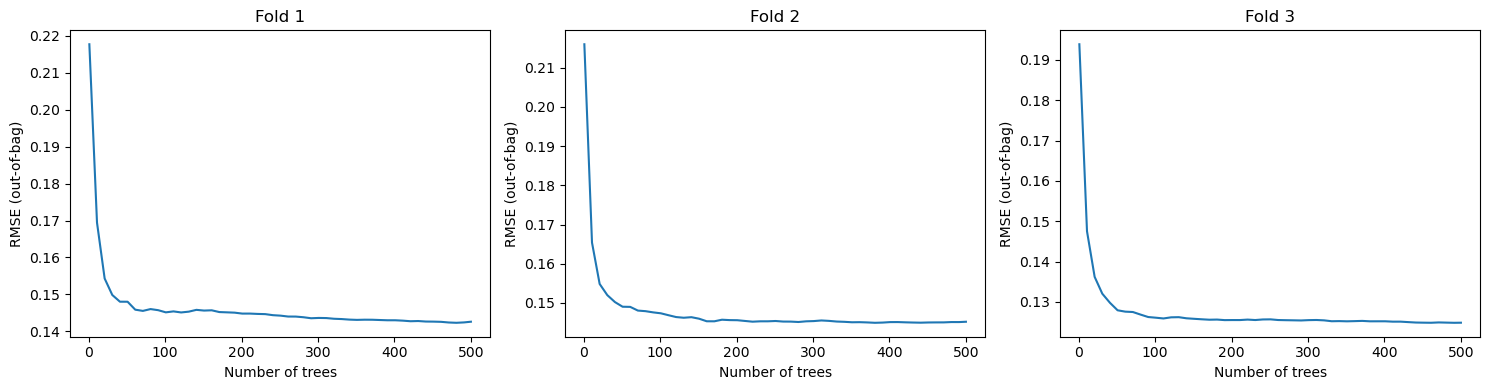

RMSE moyen sur 3 folds: 32356.18
RMLSE moyen: 0.155, Std: 0.018
Expected range for test RMSLE: [0.118, 0.192]


In [589]:
# Paramètres
n_splits = 3
label = "SalePrice"
groups = dataset_df["Neighborhood"] 

# Préparer les subplots (1 ligne, n_splits colonnes)
fig, axes = plt.subplots(1, n_splits, figsize=(5 * n_splits, 4))

# Initialiser KFold
# gss = GroupShuffleSplit(n_splits=n_splits, test_size=0.3)
# gkf = GroupKFold(n_splits=5)
# skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
sgkf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=42)

stack_train = np.zeros((X.shape[0], 2)) 
stack_test = np.zeros((X_test.shape[0], 2))

rmse_scores = []
rmlse_scores = []

for i, (train_idx, valid_idx) in enumerate(sgkf.split(X, y_binned, groups=groups)):
    # X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]

    # --- Random Forest TF-DF ---
    train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
        dataset_df.iloc[train_idx], label=label, task=tfdf.keras.Task.REGRESSION
    )
    valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
        dataset_df.iloc[valid_idx], label=label, task=tfdf.keras.Task.REGRESSION
    )

    # rf_model = tfdf.keras.RandomForestModel(
    #     hyperparameter_template="benchmark_rank1",    
    #                                                     # num_trees ≈ 300 (plutôt modéré, pour éviter d’être trop lent).
    #                                                     # max_depth non limité (ou très grand, ex. 16+), donc les arbres poussent assez profond.
    #                                                     # min_examples ≈ 1 → feuilles très fines possibles (propension à l’overfit si les données sont bruitées).
    #                                                     # sampling_ratio ≈ 1.0 → chaque arbre voit ~100% des données (moins de bagging).
    #                                                     # num_candidate_attributes_ratio ≈ 1.0 → chaque split peut utiliser toutes les features disponibles.
    #                                                     # bootstrap = True.
    #     task=tfdf.keras.Task.REGRESSION,
    #     random_seed=42
    # )

    # rf_model = tfdf.keras.RandomForestModel(
    #         task=tfdf.keras.Task.REGRESSION,
    #         num_trees=500,                # Assez d’arbres pour la stabilité
    #         max_depth=12,                 # Empêche les arbres trop complexes
    #         min_examples=5,               # Pas de splits sur peu de données
    #         bootstrap_training_dataset=True,  # Ajoute de la diversité
    #         honest=True,                  # Honest estimation
    #         categorical_algorithm="RANDOM",  # Catégorielles plus robustes
    #         random_seed=42
    #     )
    
    rf_model = tfdf.keras.RandomForestModel(
                hyperparameter_template="benchmark_rank1",    
                task=tfdf.keras.Task.REGRESSION,
                num_trees=500,         # beaucoup d’arbres pour stabiliser la prédiction
                # max_depth=15,           # limite pour réduire l’overfitting
                # min_examples=5,         # chaque feuille doit avoir au moins 5 exemples
                random_seed=42,
        )

    rf_model.fit(train_ds, verbose=0)
    stack_train[valid_idx, 0] = rf_model.predict(valid_ds).squeeze()
    stack_test[:, 0] += rf_model.predict(test_ds).squeeze() / n_splits

    # --- XGBoost ---
    X_xgb_train, X_xgb_valid = X_xgb.iloc[train_idx], X_xgb.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    xgb_model = xgb.XGBRegressor(
        n_estimators=1000, 
        learning_rate=0.05, 
        early_stopping_rounds=50
    )
    
    # xgb_model = xgb.XGBRegressor(
    #     objective = "reg:squarederror",
    #     max_depth = 6,            # profondeur modérée
    #     learning_rate = 0.05,     # learning rate bas pour régulariser
    #     n_estimators = 1000,      # assez d’arbres pour couvrir la complexité
    #     subsample = 0.8,          # 80% des samples par arbre pour réduire overfitting
    #     colsample_bytree = 0.8,   # 80% des features par arbre
    #     early_stopping_rounds=50,
    #     random_state = 42,
    # )
    xgb_model.fit(X_xgb_train, y_train, eval_set=[(X_xgb_valid, y_valid)], verbose=50)
    stack_train[valid_idx, 1] = xgb_model.predict(X_xgb_valid)
    stack_test[:, 1] += xgb_model.predict(X_xgb_test) / n_splits

    rf_valid_pred = np.expm1(stack_train[valid_idx, 0])              # retour à l’échelle réelle
    rf_valid_target = np.expm1(y_valid)
    rf_valid_rmse = np.sqrt(mean_squared_error(rf_valid_target, rf_valid_pred))
    rf_valid_rmlse = np.sqrt(mean_squared_error(y_valid, stack_train[valid_idx, 0]))
    
    xgb_valid_pred = np.expm1(stack_train[valid_idx, 1])
    xgb_valid_target = np.expm1(y_valid)
    xgb_valid_rmse = np.sqrt(mean_squared_error(xgb_valid_target, xgb_valid_pred))
    xgb_valid_rmlse = np.sqrt(mean_squared_error(y_valid, stack_train[valid_idx, 1]))

    
    print("Quartiers en train :", dataset_df.loc[train_idx, "Neighborhood"].unique())
    print("Quartiers en test  :", dataset_df.loc[valid_idx, "Neighborhood"].unique())
    print("Nombre d'échantillons train :", len(train_idx))
    print("Nombre d'échantillons test  :", len(valid_idx))
    print(f"Fold {i+1} → RANDOM FOREST RMSE: {rf_valid_rmse:.2f} | XGBoost RMSE: {xgb_valid_rmse:.2f}")
    print(f"Fold {i+1} → RANDOM FOREST RMLSE: {rf_valid_rmlse:.2f} | XGBoost RMLSE: {xgb_valid_rmlse:.2f}")
    
    rmse_scores.append((rf_valid_rmse+xgb_valid_rmse)/2)
    rmlse_scores.append((rf_valid_rmlse+xgb_valid_rmlse)/2)

    # Logs d’entraînement
    logs = rf_model.make_inspector().training_logs()
    axes[i].plot(
        [log.num_trees for log in logs],
        [log.evaluation.rmse for log in logs]
    )
    axes[i].set_title(f"Fold {i+1}")
    axes[i].set_xlabel("Number of trees")
    axes[i].set_ylabel("RMSE (out-of-bag)")

plt.tight_layout()
plt.show()

print(f"RMSE moyen sur {n_splits} folds: {np.mean(rmse_scores):.2f}")
mean_cv = np.mean(rmlse_scores)
std_cv = np.std(rmlse_scores, ddof=1)  # écart-type échantillon
print(f"RMLSE moyen: {mean_cv:.3f}, Std: {std_cv:.3f}")
ci_low = mean_cv - 2*std_cv
ci_high = mean_cv + 2*std_cv
print(f"Expected range for test RMSLE: [{ci_low:.3f}, {ci_high:.3f}]")


### Meta model learning (Linear regression):

In [632]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# meta_model = LinearRegression()
meta_model = Ridge(alpha=1.0, random_state=42)
# meta_model = Lasso(alpha=0.1, random_state=42)


meta_model.fit(stack_train, y) 
final_preds = meta_model.predict(stack_test) 

In [633]:
# label = 'SalePrice'
# train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
# valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

In [634]:
# tfdf.keras.get_all_models()

In [635]:
# rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)
# rf.compile(metrics=["mse"])

In [636]:
# rf.fit(x=train_ds)

In [637]:
# from IPython.display import HTML, display
# import tensorflow_decision_forests as tfdf

# # rf is your trained model
# html = tfdf.model_plotter.plot_model(rf, tree_idx=0, max_depth=4)
# display(HTML(html))

In [638]:
# import matplotlib.pyplot as plt
# logs = rf.make_inspector().training_logs()
# plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
# plt.xlabel("Number of trees")
# plt.ylabel("RMSE (out-of-bag)")
# plt.show()

In [639]:
# inspector.features()

In [640]:
# evaluation = rf.evaluate(x=valid_ds,return_dict=True)

# for name, value in evaluation.items():
#   print(f"{name}: {value:.4f}")

In [641]:
inspector = rf_model.make_inspector()
inspector.evaluation()
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


In [642]:
print(inspector.variable_importances()["NUM_AS_ROOT"])


[("OverallQual*YearBuilt" (1; #67), 188.0), ("OverallQual*GrLivArea" (1; #65), 157.0), ("OverallQual" (1; #64), 97.0), ("GrLivArea" (1; #39), 35.0), ("Bath" (1; #3), 27.0), ("YearBuilt*YearRemodAdd" (1; #82), 22.0), ("YearBuilt" (1; #81), 21.0), ("BsmtQual" (1; #15), 19.0), ("FullBath" (1; #29), 19.0), ("LotFrontage*LotArea" (1; #50), 19.0), ("1stFlrSF" (1; #0), 16.0), ("KitchenQual" (1; #45), 16.0), ("LotArea" (1; #47), 16.0), ("PoolArea" (1; #69), 15.0), ("GarageArea" (1; #32), 14.0), ("HouseAgeAtSale" (1; #42), 14.0), ("LotFrontage*PoolQC" (1; #51), 14.0), ("GarageCond" (1; #34), 13.0), ("PoolQC" (1; #70), 12.0), ("3SsnPorch" (1; #2), 11.0), ("LotFrontage*YearBuilt" (1; #52), 10.0), ("TotalBsmtSF" (1; #78), 10.0), ("GarageQual" (1; #36), 9.0), ("GarageYrBlt" (1; #38), 9.0), ("OverallQual*LotFrontage" (1; #66), 9.0), ("BsmtCond" (1; #7), 8.0), ("GarageAgeAtSale" (1; #31), 8.0), ("LotFrontage" (1; #49), 8.0), ("MiscVal" (1; #59), 8.0), ("LowQualFinSF" (1; #54), 7.0), ("BsmtHalfBath" (

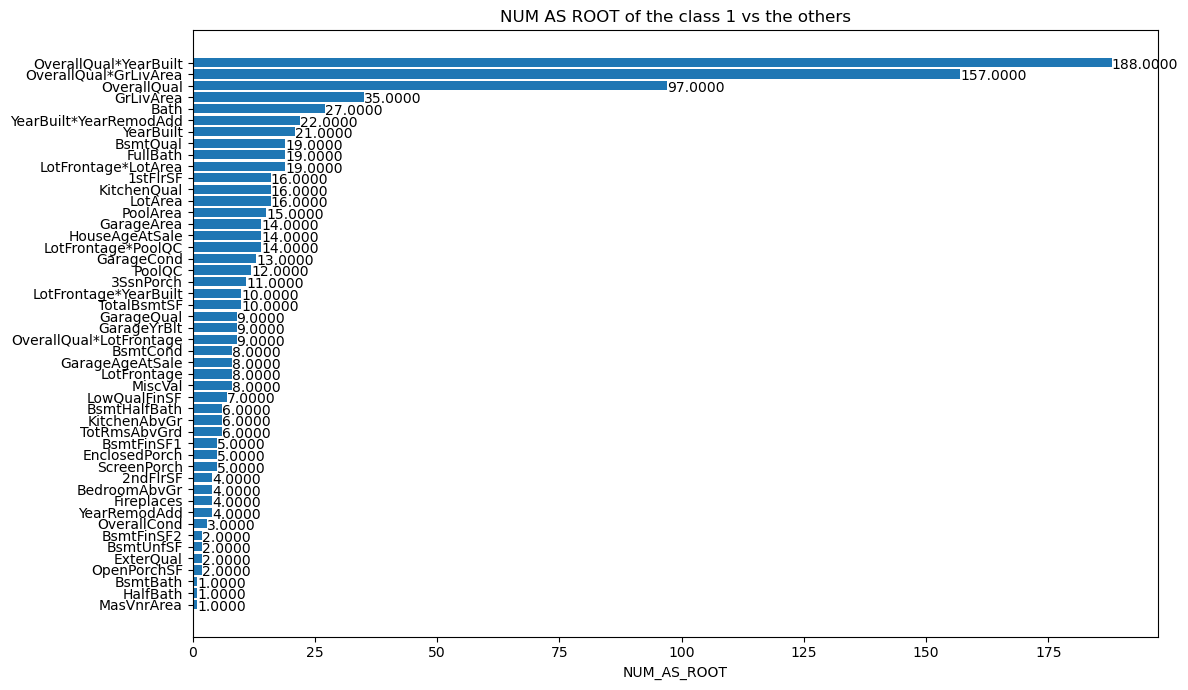

In [643]:
plt.figure(figsize=(12, 7))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [644]:
# Extraire toutes les importances
importances = inspector.variable_importances()

# On va récupérer seulement les 3 types qui nous intéressent
keys = ["NUM_AS_ROOT", "SUM_SCORE", "INV_MEAN_MIN_DEPTH"]

# Construire un DataFrame
dfs = []
for key in keys:
    data = []
    # importances[key] est une liste de tuples (feature, importance)
    for feat, imp in importances.get(key, []):
        if isinstance(feat, str):
            data.append((feat, imp))
        else:
            data.append((feat.name, imp))  # Sinon, on extrait son .name
    df = pd.DataFrame(data, columns=["Feature", key])
    dfs.append(df)

# Fusionner les 3 DataFrames
df_importances = dfs[0]
for df in dfs[1:]:
    df_importances = df_importances.merge(df, on="Feature", how="outer").fillna(0)

df_importances.sort_values("NUM_AS_ROOT", ascending=False).tail(10)

,Feature,NUM_AS_ROOT,SUM_SCORE,INV_MEAN_MIN_DEPTH
19,Condition2,0.0,0.010291,0.102304
20,Electrical,0.0,6.792804,0.102341
22,ExterCond,0.0,8.097059,0.102401
8,BsmtExposure,0.0,565.880773,0.110240
11,BsmtFinType1,0.0,112.851976,0.104146
12,BsmtFinType2,0.0,3.847238,0.102412
13,BsmtFullBath,0.0,748.129160,0.113229
67,PavedDrive,0.0,12.956008,0.102419
70,RoofStyle,0.0,10.048547,0.102468
71,SaleCondition,0.0,53.498394,0.103043


In [645]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_importances[["NUM_AS_ROOT", "SUM_SCORE", "INV_MEAN_MIN_DEPTH"]] = scaler.fit_transform(
    df_importances[["NUM_AS_ROOT", "SUM_SCORE", "INV_MEAN_MIN_DEPTH"]]
)

# Moyenne des 3 scores (ou pondération si tu veux privilégier un critère)
df_importances["Combined"] = df_importances[["NUM_AS_ROOT", "SUM_SCORE", "INV_MEAN_MIN_DEPTH"]].mean(axis=1)

# Trier par importance combinée
df_importances = df_importances.sort_values("Combined", ascending=False)
print(df_importances.head(10))
print(df_importances.tail(10))

                   Feature  NUM_AS_ROOT  SUM_SCORE  INV_MEAN_MIN_DEPTH  \
64   OverallQual*GrLivArea     0.835106   1.000000            1.000000   
66   OverallQual*YearBuilt     1.000000   0.929702            0.622233   
63             OverallQual     0.515957   0.477979            0.275012   
39               GrLivArea     0.186170   0.286549            0.255435   
75             TotalBsmtSF     0.053191   0.186121            0.210322   
0                 1stFlrSF     0.085106   0.182704            0.173802   
3                     Bath     0.143617   0.142475            0.099673   
78  YearBuilt*YearRemodAdd     0.117021   0.144174            0.122665   
50     LotFrontage*LotArea     0.101064   0.146661            0.123314   
47                 LotArea     0.085106   0.142508            0.136766   

    Combined  
64  0.945035  
66  0.850645  
63  0.422983  
39  0.242718  
75  0.149878  
0   0.147204  
3   0.128588  
78  0.127953  
50  0.123680  
47  0.121460  
         Feature  NU

In [646]:
# ['GarageType', 'PavedDrive', 'SaleCondition', 'LandContour', 'HeatingQC', 'HouseStyle', 'BldgType', 'LotConfig', 'ExterCond', 'LotShape', 'RoofStyle', \
# 'Foundation', 'FireplaceQu', 'Condition1', 'Functional', 'HeatingQC']

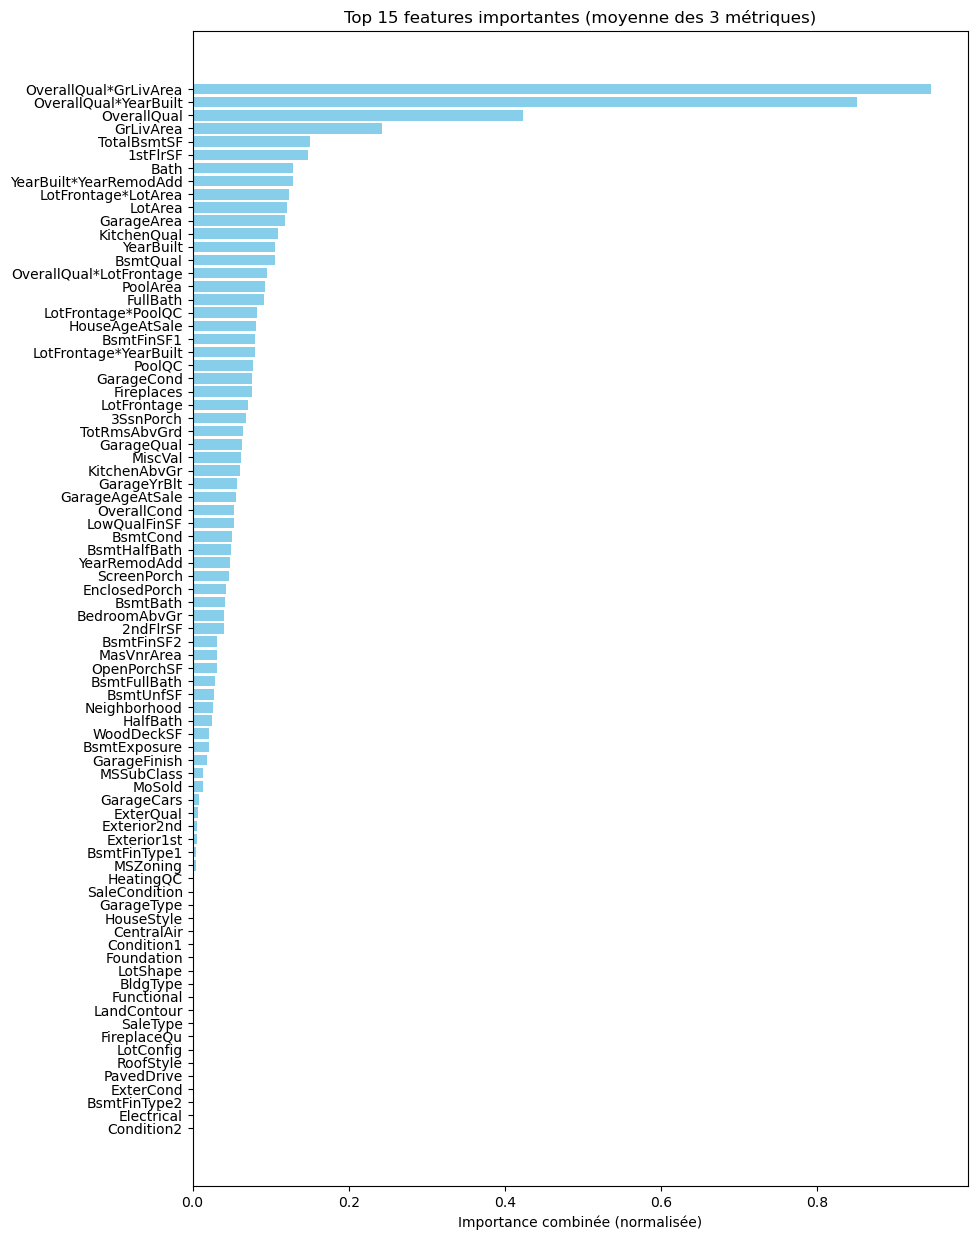

In [647]:
import matplotlib.pyplot as plt

top_features = df_importances.head(15)

plt.figure(figsize=(10,15))
plt.barh(df_importances["Feature"].astype(str), df_importances["Combined"], color="skyblue")
plt.gca().invert_yaxis()
plt.xlabel("Importance combinée (normalisée)")
plt.title("Top 15 features importantes (moyenne des 3 métriques)")
plt.show()


In [648]:
# full_ds = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label="SalePrice", task=tfdf.keras.Task.REGRESSION)
# final_model = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)
# final_model.fit(full_ds)

In [649]:
sample_submission_df = pd.read_csv('../data/sample_submission.csv')
sample_submission_df['SalePrice'] = meta_model.predict(stack_test)
sample_submission_df['SalePrice']= sample_submission_df['SalePrice'].apply(lambda x: np.expm1(x))
sample_submission_df.to_csv('../submissions/submission25.csv', index=False)
sample_submission_df.head()

,Id,SalePrice
0,1461,119895.651632
1,1462,152285.699276
2,1463,172290.233532
3,1464,183129.343075
4,1465,188321.388115


In [650]:
# kaggle competitions submit -c house-prices-advanced-regression-techniques -f work/submissions/submission11_retrain_model_on_full_DS.csv -m "11th try: retrain model on full DS "